In [1]:
import jax.numpy as np
import jax.random as jr
import dLux as dl
from tqdm.notebook import tqdm
from matplotlib import colormaps
from matplotlib import pyplot as plt

dLux: Jax is running in 32-bit, to enable 64-bit visit: https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html#double-64bit-precision


/Users/louis/mambaforge/envs/models/lib/python3.11/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /Users/louis/Data/pysynphot/grp/redcat/trds/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/Users/louis/mambaforge/envs/models/lib/python3.11/site-packages/pysynphot/refs.py:117: UserWarning: No graph or component tables found; functionality will be SEVERELY crippled. No files found for /Users/louis/Data/pysynphot/grp/redcat/trds/mtab/*_tmg.fits
  warnings.warn('No graph or component tables found; '
/Users/louis/mambaforge/envs/models/lib/python3.11/site-packages/pysynphot/refs.py:124: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /Users/louis/Data/pysynphot/grp/redcat/trds/mtab/*_tmt.fits
  warnings.warn('No thermal tables found, '


In [2]:
from bayes import *

In [3]:
plt.rcParams['image.cmap'] = 'inferno'
plt.rcParams["font.family"] = "serif"
plt.rcParams["image.origin"] = 'lower'
plt.rcParams['figure.dpi'] = 120
cmap = colormaps['inferno']
cmap.set_bad('k',0.8)

In [4]:
from models import binary_model

model = binary_model()

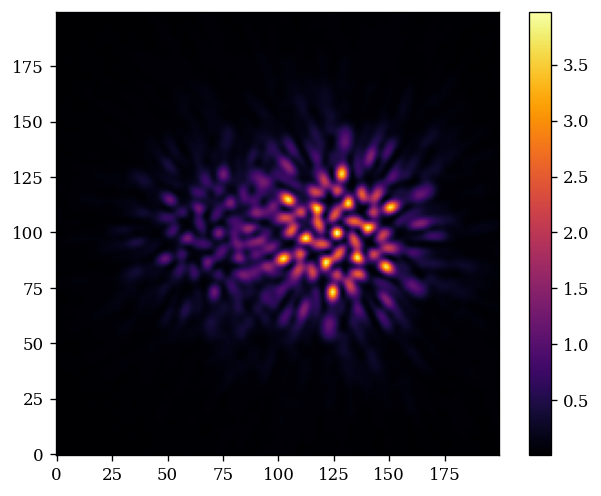

In [5]:
# Margingal Parameters
parameters = [

    # Source Parameters
    "separation", # arcseconds
    "x_position", # arcseconds
    "y_position", # arcseconds
    "position_angle", # degrees
    "log_flux", # log10(photons(/s?))
    "contrast", 
    # "wavelengths", # m

    # Instrument Parameters
    # "psf_pixel_scale", # arcseconds
    "aberrations.coefficients" # Zernikes
    ]

# Plot
plt.imshow(model.model())
plt.colorbar()
plt.show()

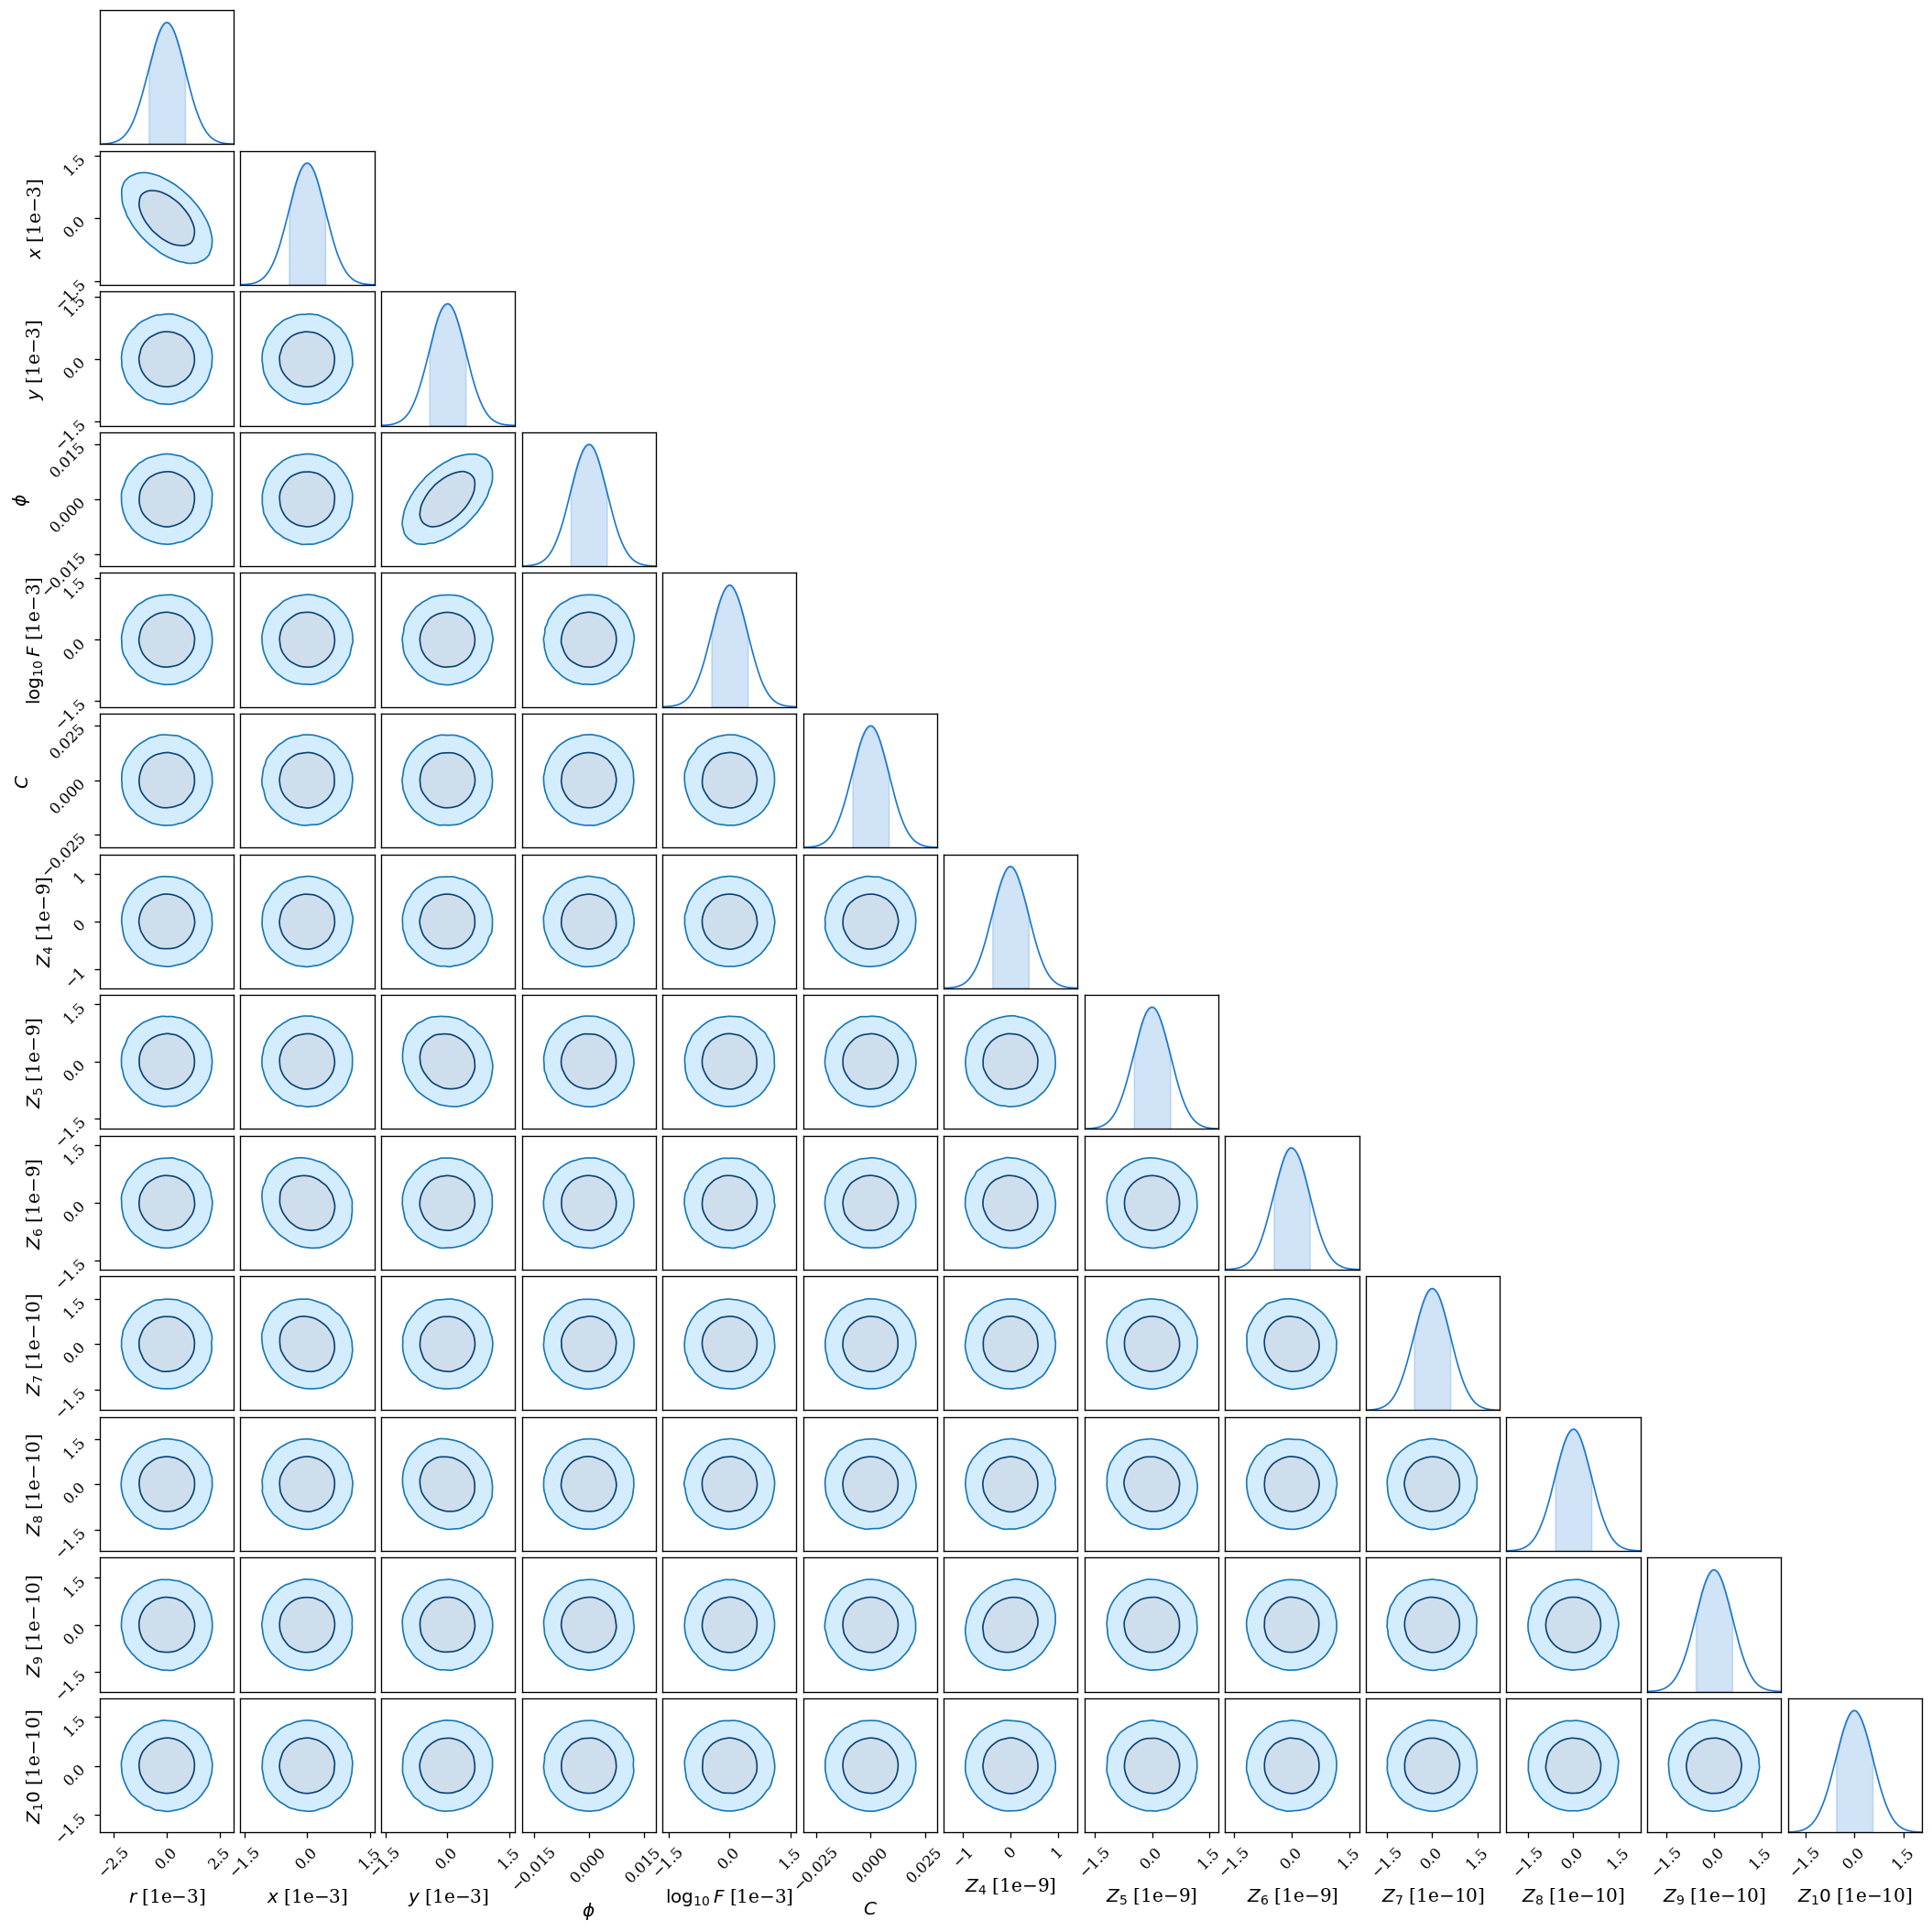

In [6]:
airy_model = model.set('mask', None)
plot_covariances(airy_model, parameters)

## FIM

  0%|          | 0/50 [00:00<?, ?it/s]

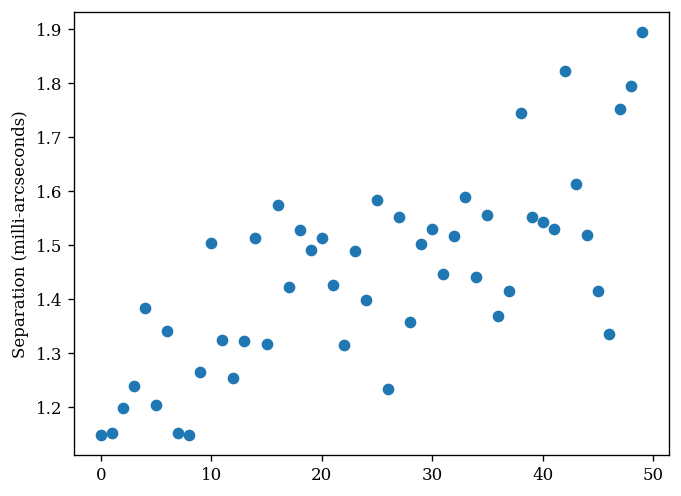

In [11]:
fisher_losses = np.load("all_losses_fisher.npy")
fisher_coefficients = np.load("all_coefficients_fisher.npy")

# Losses
indexes = np.argsort(fisher_losses[:, -1])
coefficients = fisher_coefficients[indexes]
models = [model.set('mask.coefficients', coeff[-1]) for coeff in coefficients]
covs = np.array([get_covaraince(model, parameters) for model in tqdm(models)])
separations = covs[:, 0, 0]**0.5

seeds = np.arange(len(fisher_losses))
plt.scatter(seeds, separations*1e3)
plt.ylabel("Separation (milli-arcseconds)")
plt.show()

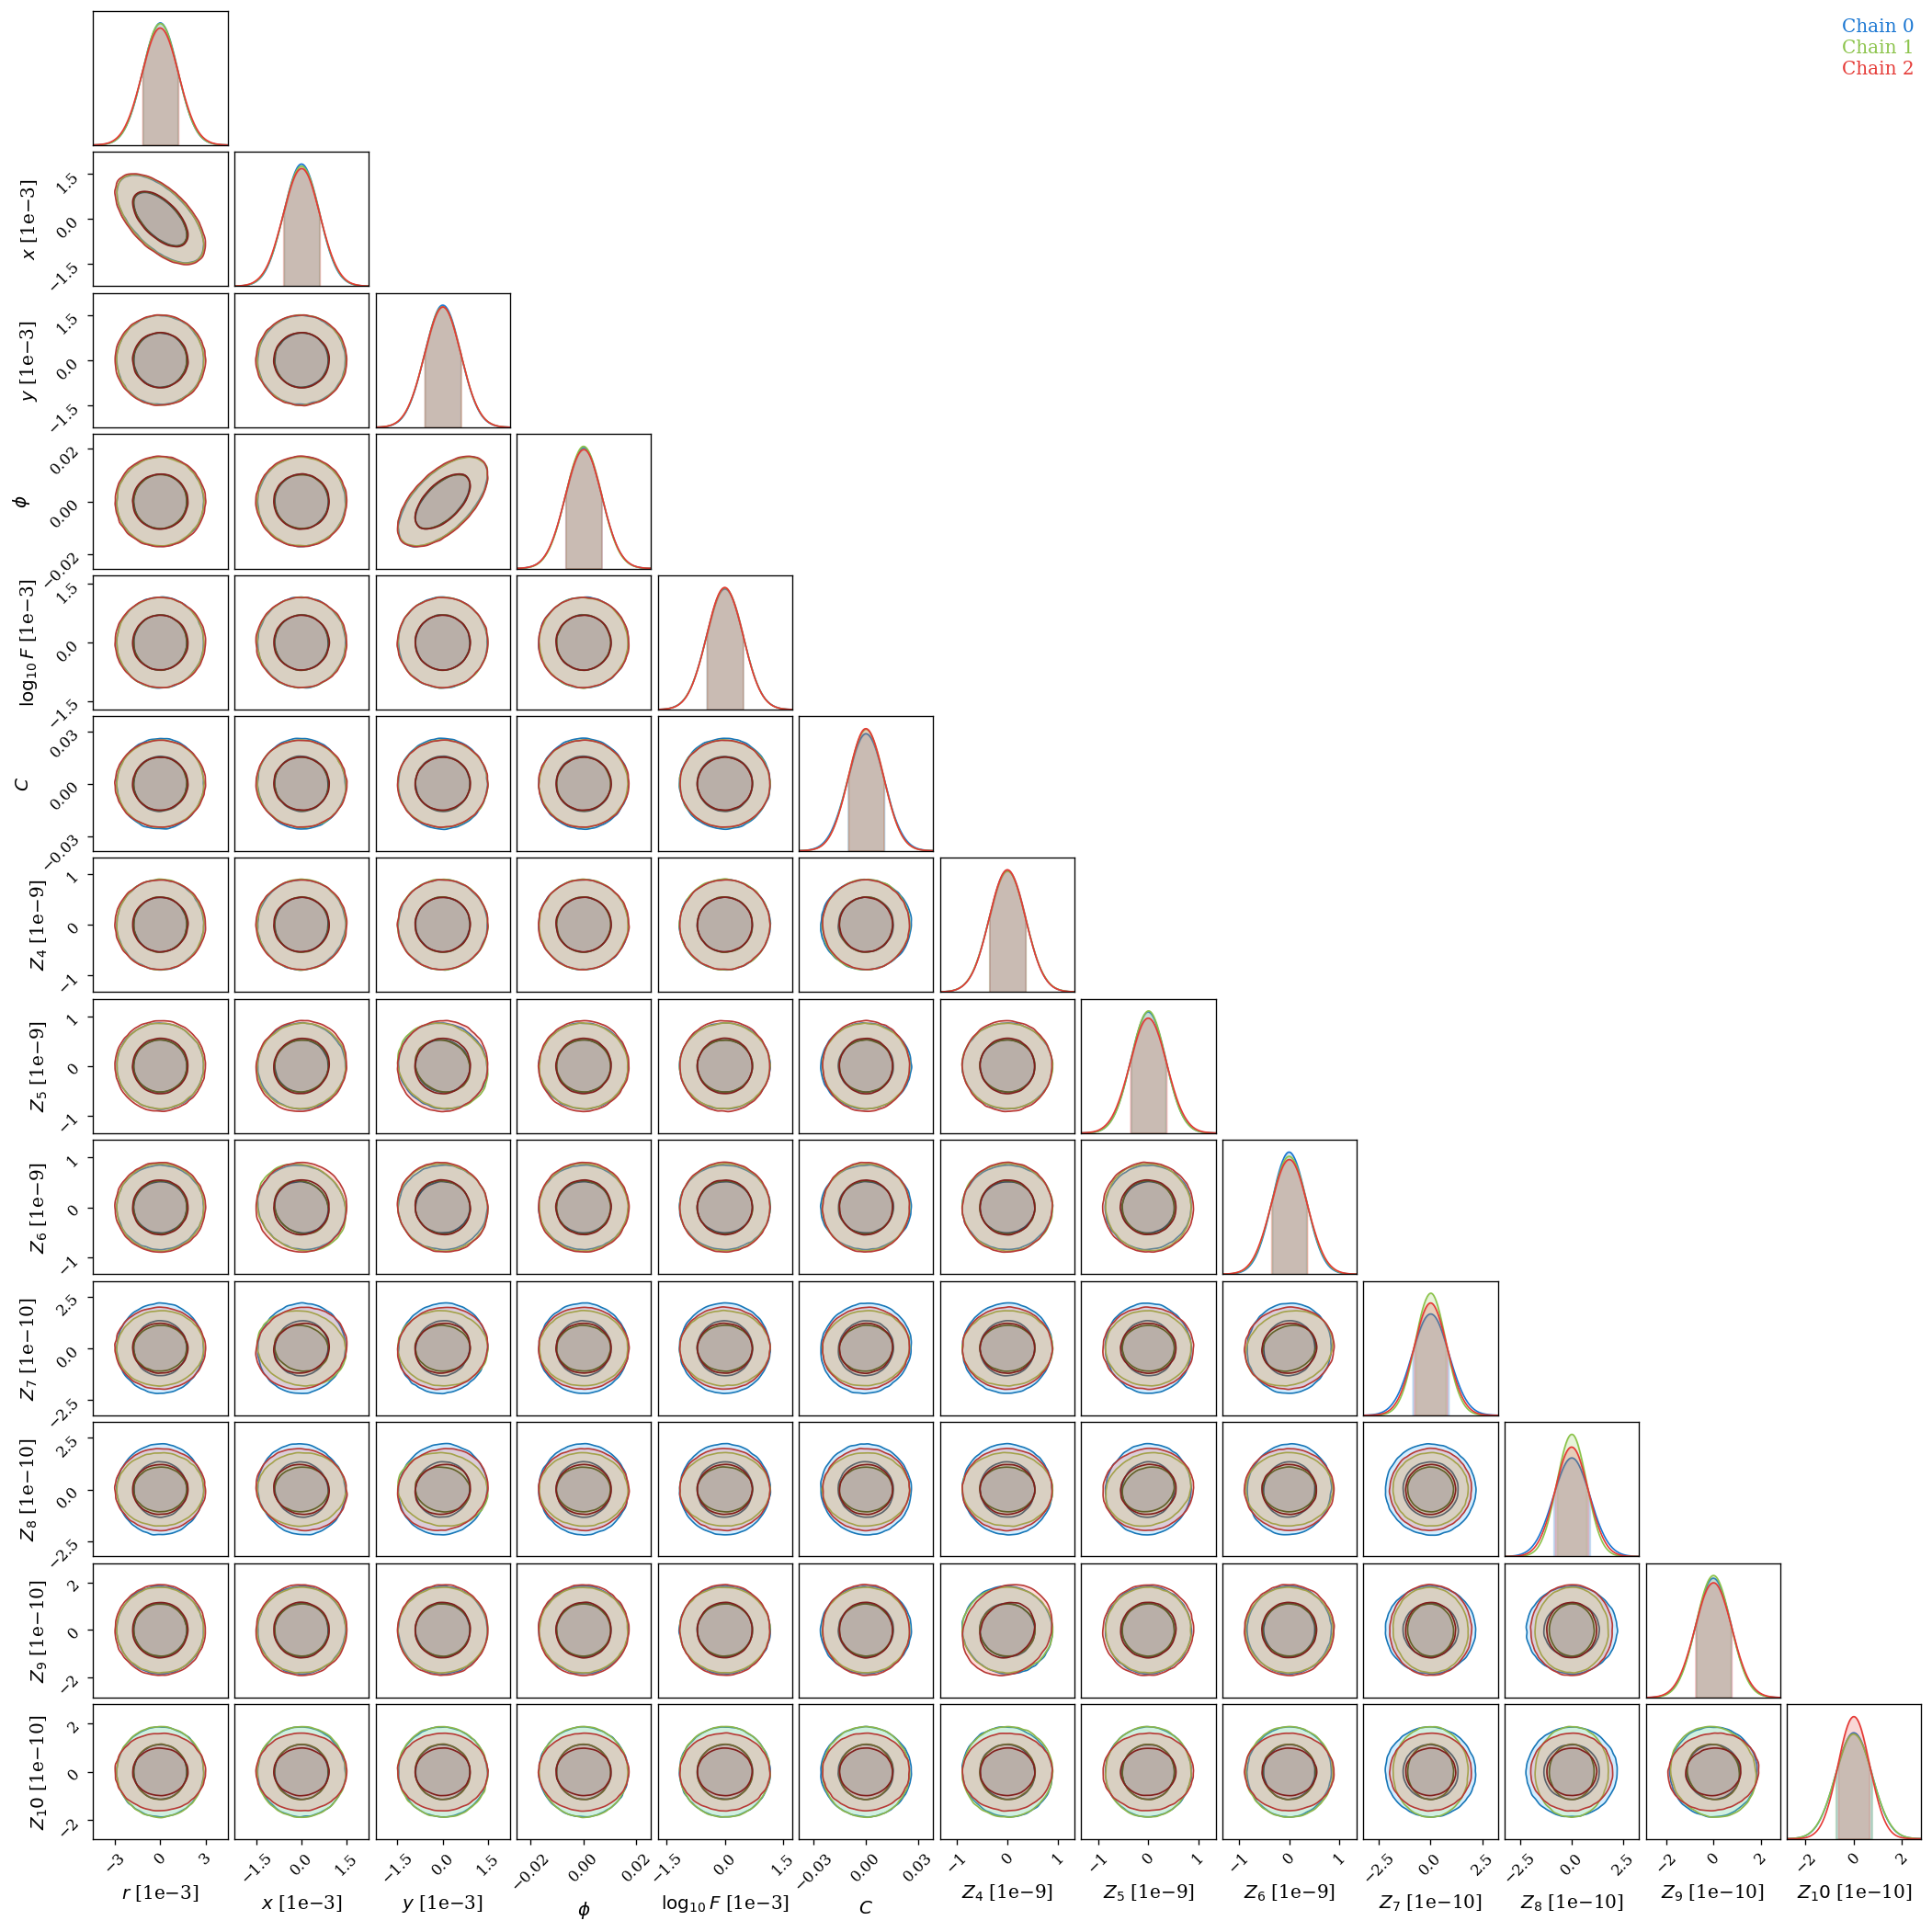

In [12]:
# Covariances
plot_covariances(models[:3], parameters)

In [22]:
# def plot_results(model):
#     source = model.source
#     binary_phase = model.mask.get_binary_phase()
#     inv_support = np.where(model.aperture <= 0.5)
#     mask = binary_phase.at[inv_support].set(np.nan)

#     plt.figure(figsize=(10, 4))
#     plt.subplot(1, 2, 1)
#     plt.imshow(mask, cmap=cmap)
#     plt.colorbar()

#     plt.subplot(1, 2, 2)
#     plt.imshow(model.propagate(source.wavelengths))
#     plt.colorbar()
#     plt.show()

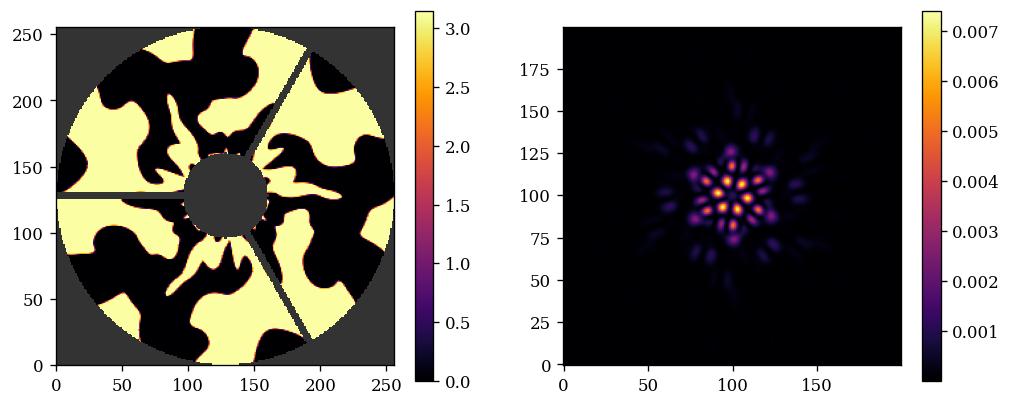

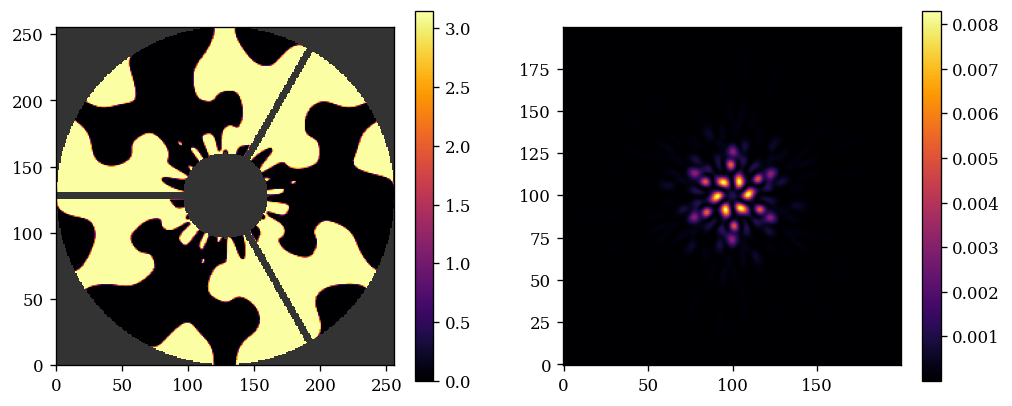

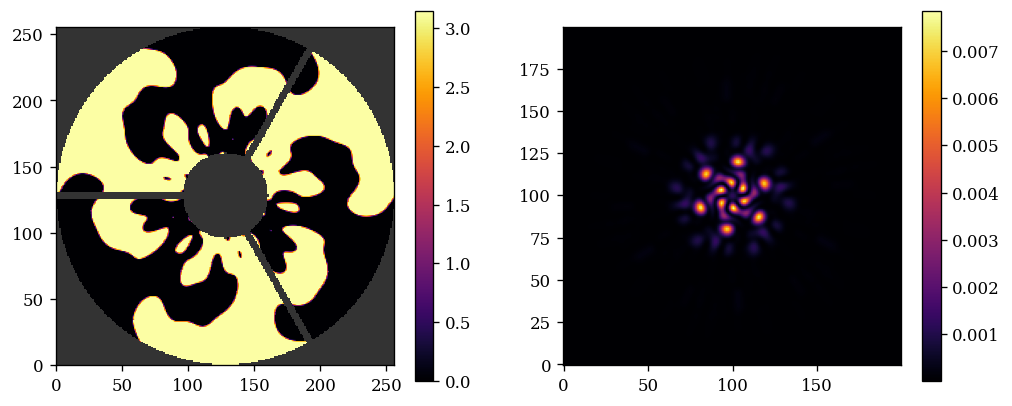

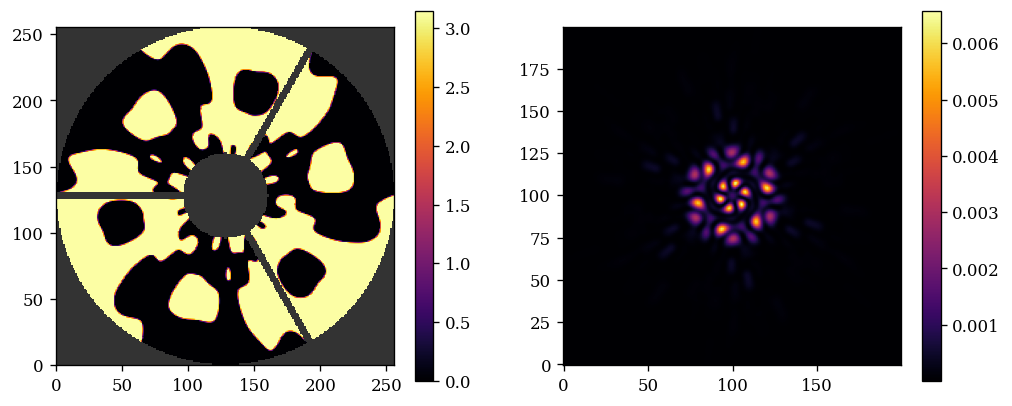

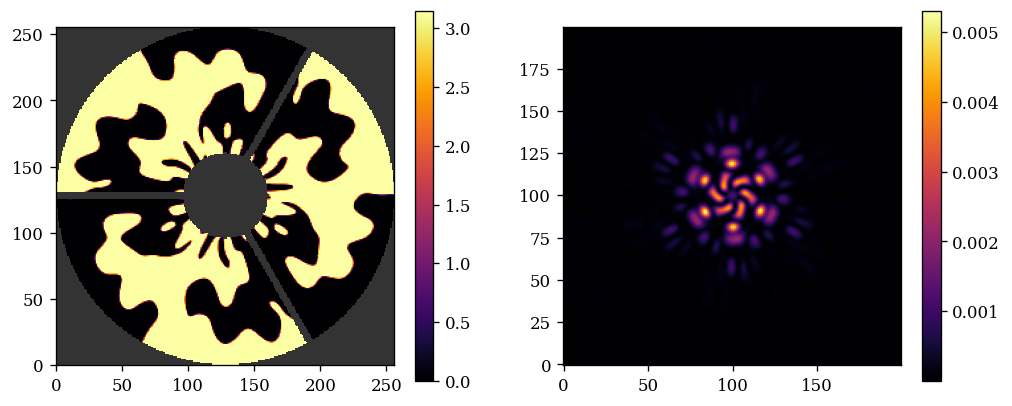

In [23]:
for model in models[:5]:
    plot_results(model)

  0%|          | 0/10 [00:00<?, ?it/s]

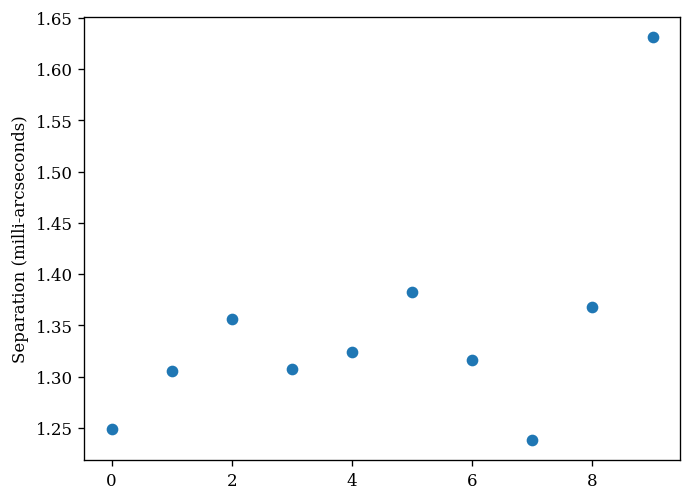

In [25]:
ge_losses = np.load("data/gradient_energy/losses.npy")
ge_coefficients = np.load("data/gradient_energy/coefficients.npy")

# Losses
indexes = np.argsort(ge_losses[:, -1])
coefficients = ge_coefficients[indexes]
models = [model.set('mask.coefficients', coeff[-1]) for coeff in coefficients]
covs = np.array([get_covaraince(model, parameters) for model in tqdm(models)])
separations = covs[:, 0, 0]**0.5

seeds = np.arange(len(ge_losses))
plt.scatter(seeds, separations*1e3)
plt.ylabel("Separation (milli-arcseconds)")
plt.show()

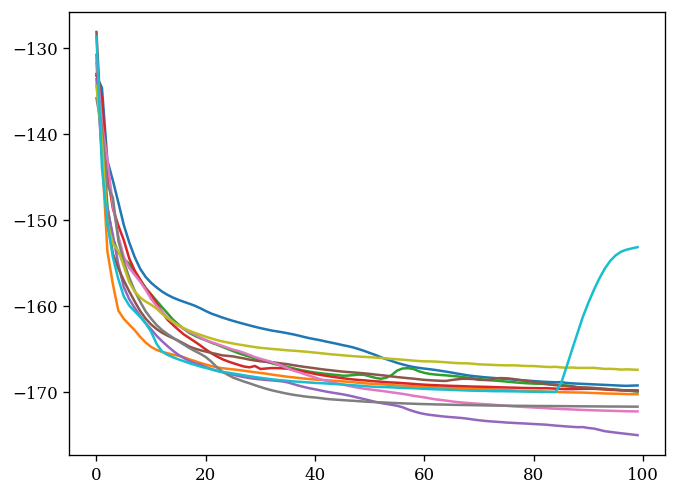

In [26]:
for loss in ge_losses:
    plt.plot(loss)
plt.show()

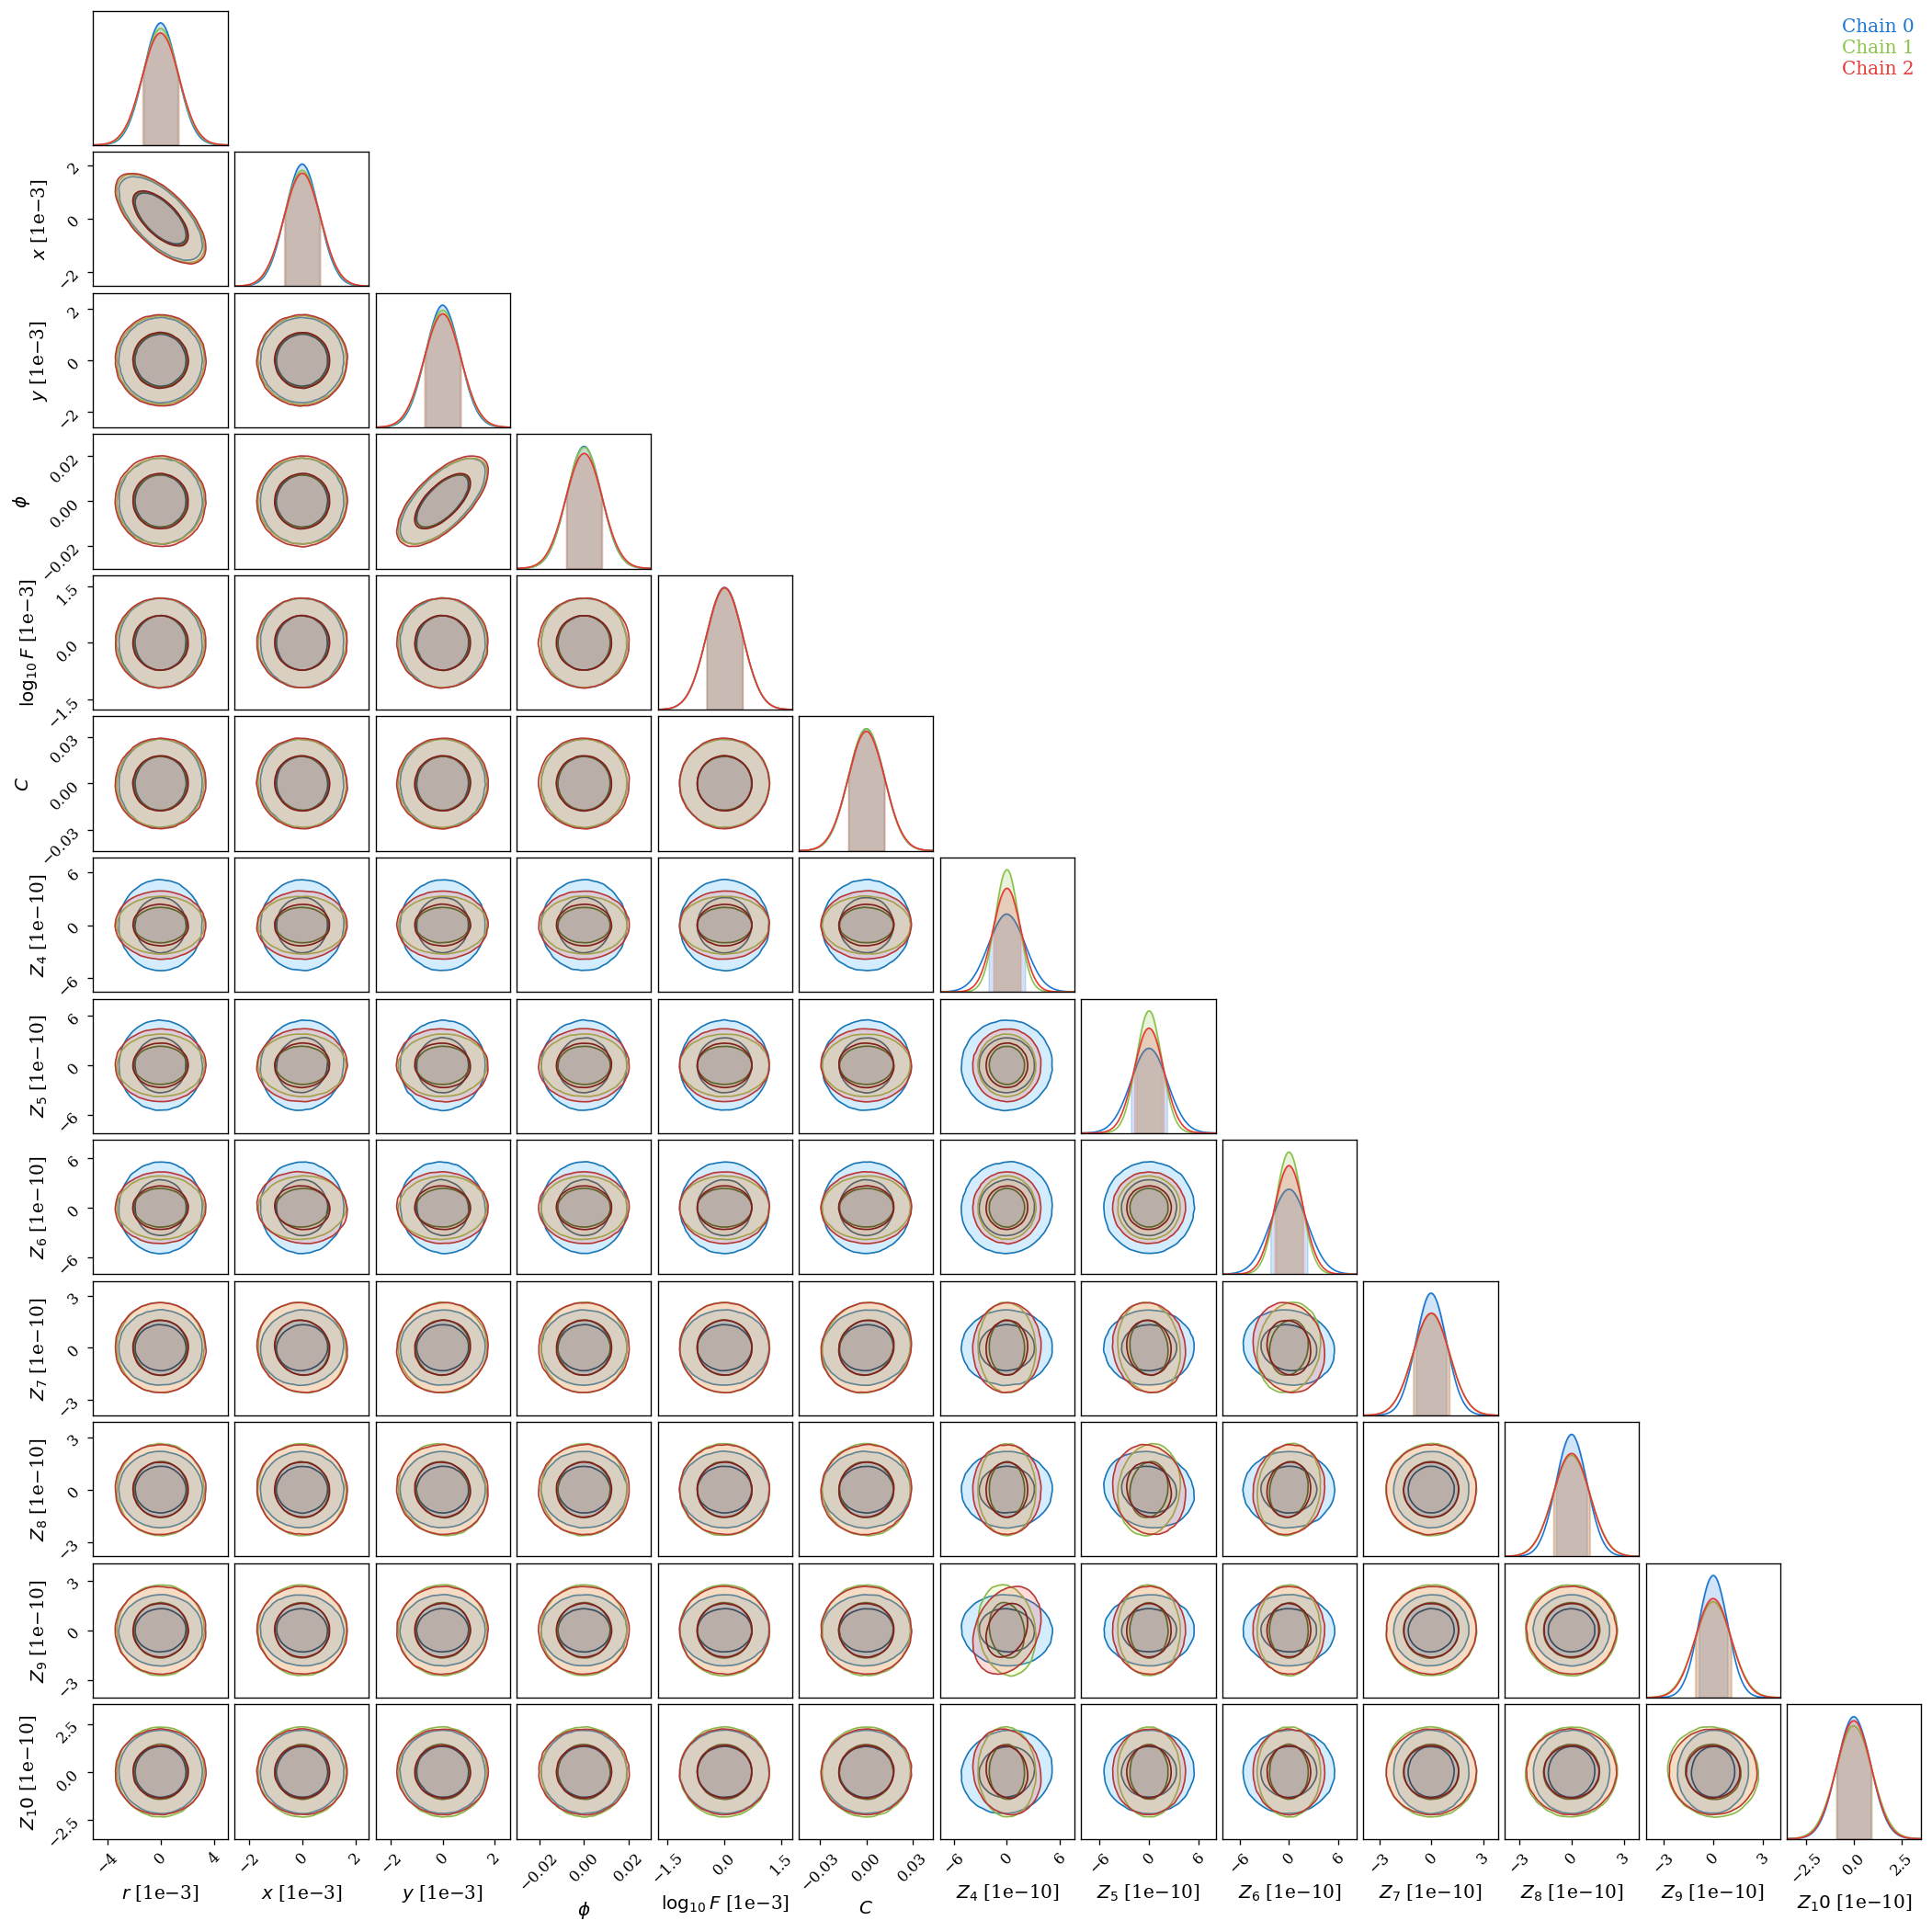

In [27]:
plot_covariances(models[:3], parameters)

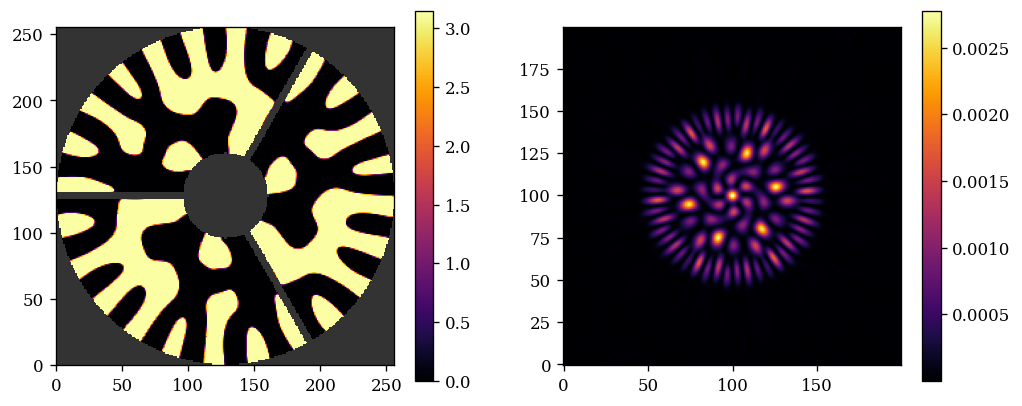

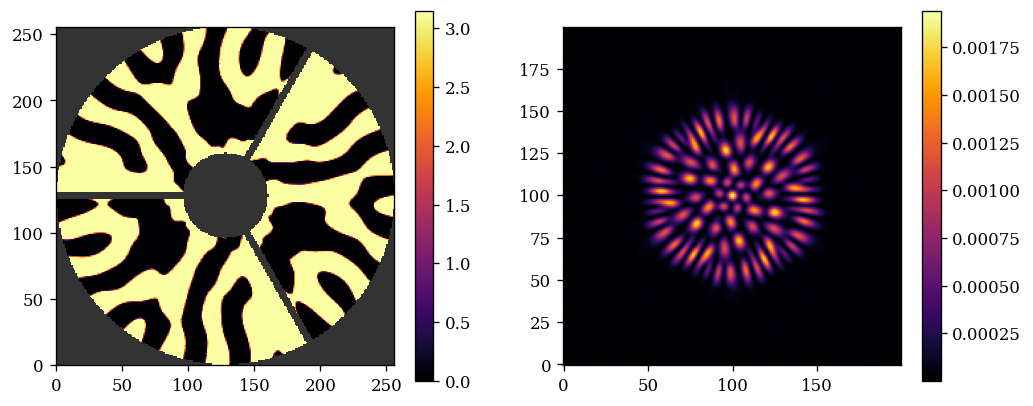

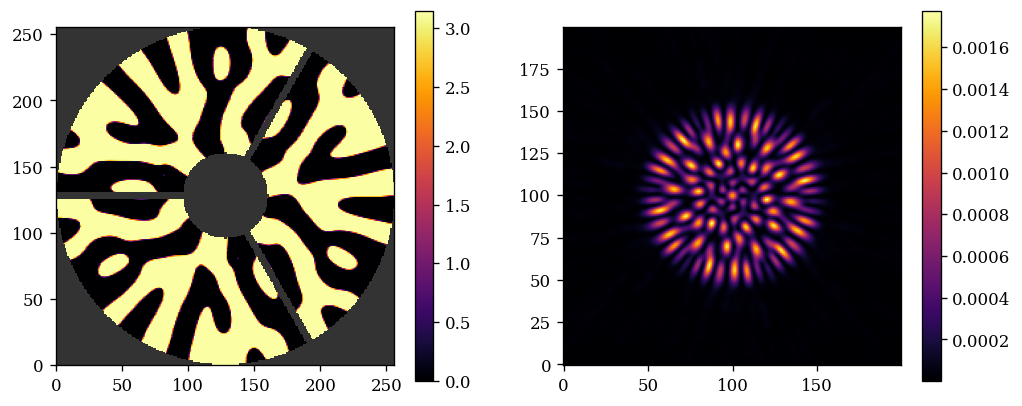

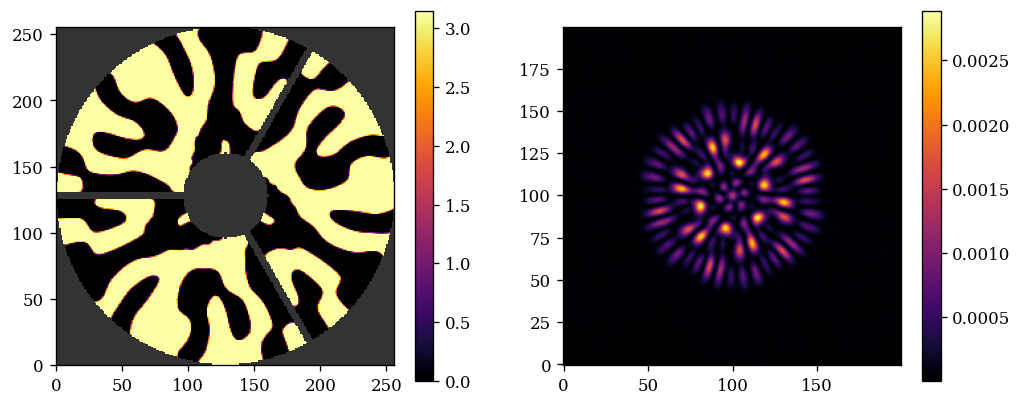

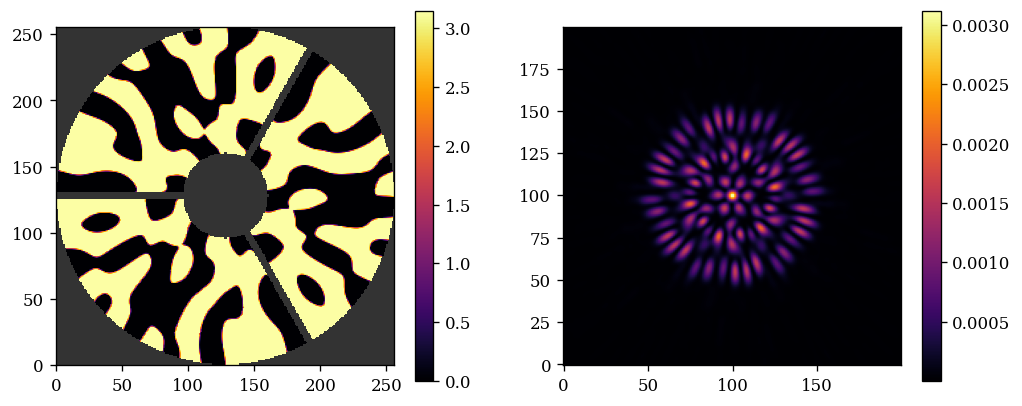

In [28]:
ge_losses = np.load("data/gradient_energy/losses.npy")
ge_coefficients = np.load("data/gradient_energy/coefficients.npy")

# Losses
indexes = np.argsort(ge_losses[:, -1])
coefficients = ge_coefficients[indexes]
models = [model.set('mask.coefficients', coeff[-1]) for coeff in coefficients]

for model in models[:5]:
    plot_results(model)